In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import moviepy.editor as mvp
from IPython.display import Image, HTML, clear_output
import importlib

2022-12-09 23:46:59.225002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 23:47:12.776621: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
os.getcwd()

'/u/sradev/deep-learning-project/caproject'

In [3]:
print(os.getcwd())
os.chdir('caproject')
!ls

/u/sradev/deep-learning-project
experiments.py	image_processing.py  Makefile	  TESTPLOT21.png  train.py
figures		images		     model.py	  TESTPLOT.png	  utils.py
figures.py	main.py		     __pycache__  test.py


In [4]:
from experiments import Experiments


...........................IN model.py...........................

...........................IN train.py...........................

...........................IN utils.py...........................


In [5]:
# Cellular Automata Parameters
HIDDEN_SIZE = 512 # size of hidden layer in CNN
CHANNEL_N = 40 # number of CA state channels
TARGET_PADDING = 16 # number of pixels used to pad the target image border
BATCH_SIZE = 8
POOL_SIZE = 1024
CELL_FIRE_RATE = 0.5
STEP_SIZE = 1.0
THRESHOLD = 0.01 # hyper-parameter denoting threshold for life

EXPERIMENT_TYPE = "persistent" #@param ["Growing", "Persistent", "Regenerating"]
EXPERIMENT_MAP = {"growing":0, "persistent":1, "regenerating":2}
EXPERIMENT_N = EXPERIMENT_MAP[EXPERIMENT_TYPE]

USE_PATTERN_POOL = [0, 1, 1][EXPERIMENT_N]
DAMAGE_N = [0, 0, 3][EXPERIMENT_N]  # number of patterns to damage in a batch

# Booleans to decide what information to store
MAKE_CHECKPOINTS = False
MAKE_POOL = False

In [6]:
!ls
os.getcwd()

HIDDEN_SIZE = 512 # size of hidden layer in CNN
CHANNEL_N = 40 # number of CA state channels
TARGET_SIZE = 125
EXPERIMENT_TYPE = "persistent"

image_name = 'bob-ross-painting'

DIR = f'figures/{image_name}-{TARGET_SIZE}/{EXPERIMENT_TYPE}/channel-{CHANNEL_N}_hidden-{HIDDEN_SIZE}/'

!ls $DIR

experiments.py	image_processing.py  Makefile	  TESTPLOT21.png  train.py
figures		images		     model.py	  TESTPLOT.png	  utils.py
figures.py	main.py		     __pycache__  test.py
batches.mp4  loss_log.npy  loss_plot.png  train_log


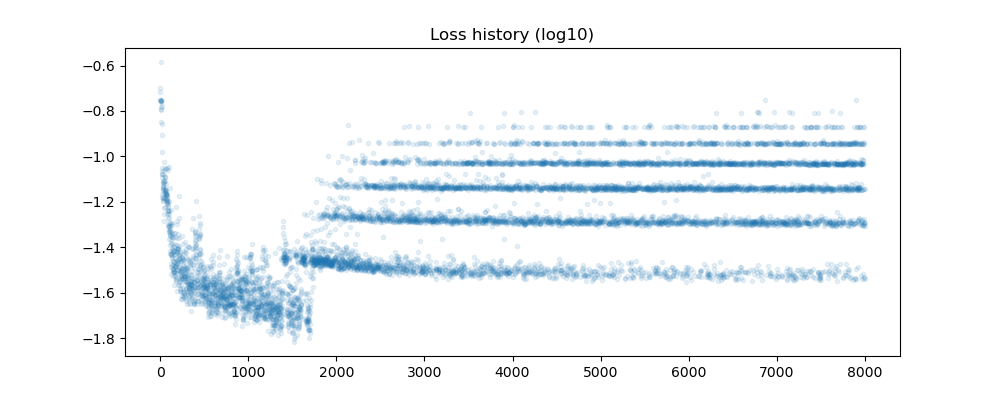

In [10]:
Image(DIR+'loss_plot.png')

In [11]:
loss_log = np.load(DIR+'loss_log.npy')
mvp.ipython_display(DIR+'batches.mp4')

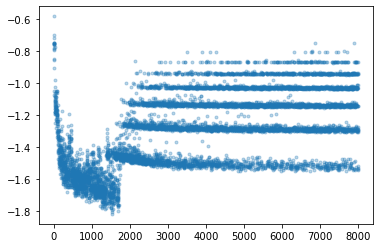

In [12]:
plt.plot(np.log10(loss_log), '.', alpha=0.3)

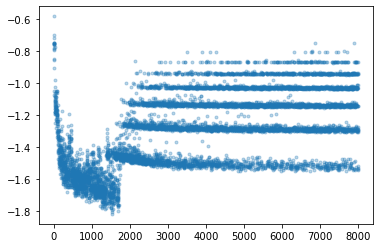

In [13]:
plt.plot(np.log10(loss_log), '.', alpha=0.3)

In [14]:
a = np.log10(loss_log[-1])
a

-1.3067833

In [15]:
b = np.log10(loss_log[-100])
b

-0.9429771

<BarContainer object of 1 artists>

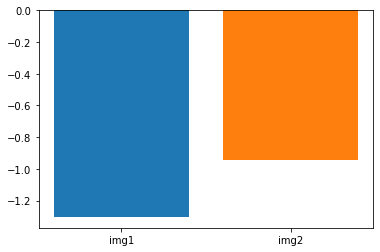

In [16]:
plt.bar('img1', a)
plt.bar('img2', b)

In [17]:
!ls $DIR
os.getcwd()

batches.mp4  loss_log.npy  loss_plot.png  train_log


'/u/sradev/deep-learning-project/caproject'

In [18]:
n_steps=1000

In [26]:
# importlib.reload('experiments')
import sys
importlib.reload(sys.modules['experiments'])
from experiments import Experiments


Running experiment 1 using living image bob-ross-painting.png with target size of 125
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (1, 3, 3, 140)            8540      
                                                                 
 conv2d_15 (Conv2D)          (1, 3, 3, 20)             2820      
                                                                 
Total params: 11,360
Trainable params: 11,360
Non-trainable params: 0
_________________________________________________________________
Model already trained at figures/bob-ross-painting-125/persistent/channel-20_hidden-140

Running experiment 1 using living image starry-night.png with target size of 125
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (1, 3,

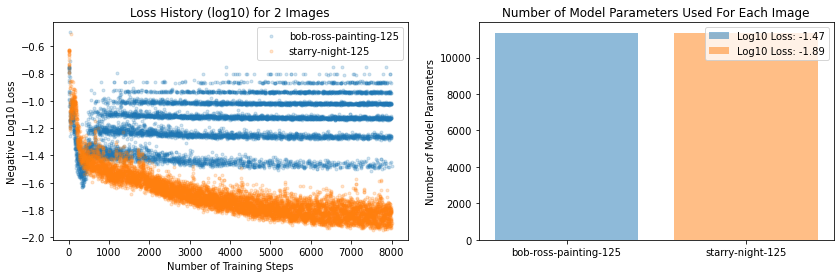

In [27]:
%%time


LIVING_MAP = {"bob-ross-painting":1, "starry-night":1, 
              "mozart1.png":0, "sleigh.png":0,
              "mozart.png":1}

# # Run experiments from experiments module
# experiments = Experiments(EXPERIMENT_TYPE, CELL_FIRE_RATE, STEP_SIZE, 
#         HIDDEN_SIZE, CHANNEL_N, TARGET_PADDING, BATCH_SIZE, POOL_SIZE, 
#         USE_PATTERN_POOL, DAMAGE_N, THRESHOLD, LIVING_MAP, n_steps, MAKE_POOL, DIR)

# Run experiments from experiments module
experiments = Experiments(EXPERIMENT_TYPE, CELL_FIRE_RATE, STEP_SIZE, 
        HIDDEN_SIZE, CHANNEL_N, TARGET_PADDING, BATCH_SIZE, POOL_SIZE, 
        USE_PATTERN_POOL, DAMAGE_N, THRESHOLD, LIVING_MAP, n_steps, MAKE_POOL)

# Run first experiment
image_names = ['bob-ross-painting', 'starry-night']
target_sizes = [125, 125]
model_params = [(20, 140), (20, 140)]
# target_imgs = []
# assert len(image_names) == len(target_sizes)
# for i in range(len(image_names)):
#     target_img, _, _ = load_alive_image(image_names[i], max_size=target_sizes[i])   
#     target_imgs.append(target_img)
# # target_img1, _, _ = load_alive_image(image_names[0], max_size=125)   
# # target_img2, _, _ = load_alive_image(image_names[1], max_size=125)   
# # target_imgs = [(image_names[0], target_img1), (image_names[1], target_img2)]

experiments.experiment1(image_names=image_names, target_sizes=target_sizes, model_params=model_params)

In [40]:
xs = np.random.randn(100)
ys = np.random.randn(100)

In [50]:
os.getcwd()

'/u/sradev/deep-learning-project/caproject'

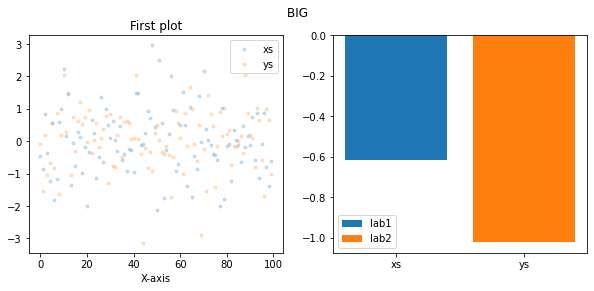

In [59]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax0.set_title("First plot")
ax0.set_xlabel("X-axis")


ax0.plot(xs, '.', alpha=0.2, label='xs')
ax0.plot(ys, '.', alpha=0.2, label='ys')



ax1.bar('xs', xs[-1], label="lab1")
ax1.bar('ys', ys[-1], label='lab2')


ax0.legend()

ax1.legend()

fig.suptitle("BIG ")

fig.show()

fig.savefig("TESTPLOT21")